### Previsione dell'affidabilità creditizia per il rilascio di una carta di credito
#### di MATTEO MARCO COSTA - 19/10/2024 - by Profession AI <br>

<div style="text-align: justify;" markdown="1">
Si è stati assunti dalla Pro National Bank come data scientist, il cui primo incarico consiste nel realizzare un modello in grado di stimare l'affidabilità creditizia dei clienti, al fine di aiutare il team dedicato a comprendere se accettare o meno la richiesta per il rilascio della carta di credito.
A tal fine vengono consegnati i dati anonimizzati di clienti che hanno già ottenuto la carta di credito e ne pagano regolarmente le rate. 
I dati sono in un file CSV presente a questo indirizzo: https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_scoring.csv 

***

Il file credit_scoring.csv contiene le informazioni dei correntisti che hanno richiesto l’apertura di una linea di credito:

    • ID: numero identificativo del cliente
    • CODE_GENDER: sesso del cliente
    • FLAG_OWN_CAR: indicatore del possesso di un'automobile
    • FLAG_OWN_REALTY: indicatore del possesso di una casa
    • CNT_CHILDREN: numero di figli
    • AMT_INCOME_TOTAL: reddito annuale
    • NAME_INCOME_TYPE: tipo di reddito
    • NAME_EDUCATION_TYPE: livello di educazione
    • NAME_FAMILY_STATUS: stato civile
    • NAME_HOUSING_TYPE: tipologia di abitazione
    • DAYS_BIRTH: numero di giorni trascorsi dalla nascita
    • DAYS_EMPLOYED: numero di giorni trascorsi dalla data di assunzione, se positivo indica il numero di giorni da quando è disoccupato
    • FLAG_MOBIL: indicatore della presenza di un numero di cellulare
    • FLAG_WORK_PHONE: indicatore della presenza di un numero di telefono di lavoro
    • FLAG_PHONE: indicatore della presenza di un numero di telefono
    • FLAG_EMAIL: indicatore della presenza di un indirizzo email
    • OCCUPATION_TYPE: tipo di occupazione
    • CNT_FAM_MEMBERS: numero di familiari
    • TARGET: una variabile che vale 1 se il cliente ha una elevata affidabilità creditizia data dal pagamento costante delle rate e 0 altrimenti.

Si richiede di realizzare un modello che preveda il target dato (variabile TARGET).

***

#### PUNTO BONUS
Se ad un cliente viene negata la carta di credito, il team deve essere in grado di fornirgli una motivazione, questo vuol dire che il tuo modello deve fornire delle indicazioni facilmente interpretabili.
</div>

### DATA IMPORT
In questa prima fase importiamo il dataset e le relative librerie per le elaborazioni successive. Successivamente effettueremo una prima analisi del dataset, ponendo attenzione alla presenza di eventuali valori a missing da trattare in fase di data cleaning.

In [1]:
#Import delle library 
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statistics as stat
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, recall_score, precision_score, f1_score   

In [2]:
#Il dataset viene fornito in formato csv: visualizzazione delle prime 5 righe
df = pd.read_csv("credit_scoring.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1


In [3]:
#Dimensioni del dataset
shape = list(df.shape)
print(f"Il dataset contiene {shape[0]} righe e {shape[1]} colonne")

Il dataset contiene 338427 righe e 19 colonne


In [4]:
#Info function: visualizzazione di eventuali missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338427 entries, 0 to 338426
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   338427 non-null  int64  
 1   CODE_GENDER          338427 non-null  object 
 2   FLAG_OWN_CAR         338427 non-null  object 
 3   FLAG_OWN_REALTY      338427 non-null  object 
 4   CNT_CHILDREN         338427 non-null  int64  
 5   AMT_INCOME_TOTAL     338427 non-null  float64
 6   NAME_INCOME_TYPE     338427 non-null  object 
 7   NAME_EDUCATION_TYPE  338427 non-null  object 
 8   NAME_FAMILY_STATUS   338426 non-null  object 
 9   NAME_HOUSING_TYPE    338426 non-null  object 
 10  DAYS_BIRTH           338426 non-null  float64
 11  DAYS_EMPLOYED        338426 non-null  float64
 12  FLAG_MOBIL           338426 non-null  float64
 13  FLAG_WORK_PHONE      338426 non-null  float64
 14  FLAG_PHONE           338426 non-null  float64
 15  FLAG_EMAIL       

<div style="text-align: justify;" markdown="1">
Dalla precedente info function, osserviamo che alcune delle 19 variabili sembrano presentare valori a missing. Infatti, le variabili
<div>

<br>

* NAME_FAMILY_STATUS   338426 non-null  object 
* NAME_HOUSING_TYPE    338426 non-null  object
* DAYS_BIRTH           338426 non-null  float64
* DAYS_EMPLOYED        338426 non-null  float64
* FLAG_MOBIL           338426 non-null  float64
* FLAG_WORK_PHONE      338426 non-null  float64
* FLAG_PHONE           338426 non-null  float64
* FLAG_EMAIL           338426 non-null  float64
* OCCUPATION_TYPE      235085 non-null  object 
* CNT_FAM_MEMBERS      338426 non-null float64

<br>

<div style="text-align: justify;" markdown="1">
presentano un numero inferiore rispetto alle 338427 righe totali. Essendo queste sia numeriche che non, dovremo indagare in modo diverso durante la fase di data cleaning. La variabile target non sembra avere valorizzazioni mancanti.
<div>

In [5]:
#Check missing values: all'interno del dataset contiamo i missing values per ogni variabile
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          1
NAME_HOUSING_TYPE           1
DAYS_BIRTH                  1
DAYS_EMPLOYED               1
FLAG_MOBIL                  1
FLAG_WORK_PHONE             1
FLAG_PHONE                  1
FLAG_EMAIL                  1
OCCUPATION_TYPE        103342
CNT_FAM_MEMBERS             1
TARGET                      0
dtype: int64

La variabile OCCUPATION_TYPE risulta quella con più valorizzazioni mancanti: nella successiva sezione approfondiremo la gestione di questi casi. Osserviamo anche la presenza di variabili presentanti un solo missing: per queste opteremo sicuramente a una drop delle righe in cui si nota una valorizzazione nulla. Tenendo presente queste considerazioni, continuiamo la gestione di queste casistiche nella sezione che segue. 

### DATA CLEANING
In questa sezione continuiamo con la gestione delle casistiche prima esposte. 

In [6]:
#Missing values: check dei record presentanti almeno un campo a missing
df.loc[:, df.isna().any()]

,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
1,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
2,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...
338422,Married,House / apartment,-23661.0,365243.0,1.0,0.0,0.0,0.0,NaN,2.0
338423,Married,House / apartment,-23661.0,365243.0,1.0,0.0,0.0,0.0,NaN,2.0
338424,Married,House / apartment,-23661.0,365243.0,1.0,0.0,0.0,0.0,NaN,2.0
338425,Married,House / apartment,-23661.0,365243.0,1.0,0.0,0.0,0.0,NaN,2.0


In [7]:
#Creazione del dataset df2 in cui effettuiamo la rimozione dei record contenenti eventuali missing
df2 = df.dropna(subset = ['NAME_FAMILY_STATUS',
                          'NAME_HOUSING_TYPE',
                          'DAYS_BIRTH',
                          'DAYS_EMPLOYED',
                          'FLAG_MOBIL',
                          'FLAG_WORK_PHONE',
                          'FLAG_PHONE',
                          'FLAG_EMAIL',
                          'DAYS_BIRTH', 
                          'DAYS_EMPLOYED',
                          'FLAG_MOBIL',
                          'FLAG_WORK_PHONE',
                          'FLAG_EMAIL',
                          'CNT_FAM_MEMBERS'])      

print(f"Numero di record pre rimozione: {df.shape} - Numero di record post rimozione: {df2.shape}")
print(f"Righe di differenza: {df.shape[0] - df2.shape[0]}")

Numero di record pre rimozione: (338427, 19) - Numero di record post rimozione: (338426, 19)
Righe di differenza: 1


Sembra che una sola riga contenesse a missing tutte le precedenti variabili. Veniamo ora allo studio della variabile OCCUPATION_TYPE.    

In [8]:
#OCCUPATION_TYPE
import collections
response = list(df2["OCCUPATION_TYPE"])
counter = collections.Counter(response)
counter

Counter({nan: 103341,
         'Security staff': 6218,
         'Sales staff': 31652,
         'Accountants': 12281,
         'Laborers': 60146,
         'Managers': 27384,
         'Drivers': 20020,
         'Core staff': 33527,
         'High skill tech staff': 13399,
         'Cleaning staff': 4594,
         'Private service staff': 2787,
         'Cooking staff': 6248,
         'Low-skill Laborers': 1714,
         'Medicine staff': 10438,
         'Secretaries': 1577,
         'Waiters/barmen staff': 1245,
         'HR staff': 567,
         'Realty agents': 852,
         'IT staff': 436})

Osserviamo che delle 338427 righe del dataset, 103341 risultano a missing per la variabile OCCUPATION_TYPE, circa il 30% del totale. In questo caso sarebbe sconveniente il drop delle righe a missing; si potrebbe o sostituire col valore della moda (che corrisponderebbe alla classe LABORERS) oppure creare una nuova classe. Optiamo per la seconda scelta essendo 30% una percentuale molto alta sull'intero dataset.

In [9]:
#Creazione della nuova classe "Missing": sostituzione dei missing con la stringa "Missing"
df3 = df2.copy() #Copy del dataset per evitare eventuali sovrascritture
df3['OCCUPATION_TYPE'].fillna("Missing", inplace=True) #Sostituzione dei missing

In [10]:
#Osserviamo che il nuovo dataset df3 non presenta più valori a missing
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338426 entries, 0 to 338425
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   338426 non-null  int64  
 1   CODE_GENDER          338426 non-null  object 
 2   FLAG_OWN_CAR         338426 non-null  object 
 3   FLAG_OWN_REALTY      338426 non-null  object 
 4   CNT_CHILDREN         338426 non-null  int64  
 5   AMT_INCOME_TOTAL     338426 non-null  float64
 6   NAME_INCOME_TYPE     338426 non-null  object 
 7   NAME_EDUCATION_TYPE  338426 non-null  object 
 8   NAME_FAMILY_STATUS   338426 non-null  object 
 9   NAME_HOUSING_TYPE    338426 non-null  object 
 10  DAYS_BIRTH           338426 non-null  float64
 11  DAYS_EMPLOYED        338426 non-null  float64
 12  FLAG_MOBIL           338426 non-null  float64
 13  FLAG_WORK_PHONE      338426 non-null  float64
 14  FLAG_PHONE           338426 non-null  float64
 15  FLAG_EMAIL       

Sistemato la questione dei campi a missing, veniamo ora ad un'analisi più approfondita del dataset, esplorando le varie variabili tra cui la variabile target.

### EDA
In questa sezione effettuiamo delle analisi più approfoindite dei campi, valutando quelli più performanti per l'elaborazione dei modelli di classificazione che implementeremo successivamente. Per facilitare l'indagine di ogni variabile, costruiamo la function barplot_stat con la quale avere un'analisi descrittiva della variabile considerata. 

In [11]:
#Costruzione della funzione barplot_stat
import seaborn as sns

def barplot_stat(var, dataset, freq = "No"):
    plt.figure(figsize=(10,6))
    sns.countplot(data = dataset, x = var).tick_params(axis='x', rotation=60)
    if freq == "Yes":
        print(f"{var} --- Absolute frequency distribution")
        print(f"{dataset[var].value_counts()}\n")
        print(f"{var} --- Relative frequency distribution")
        print(f"{dataset[var].value_counts()/len(dataset)}\n")
    
        """
        La function barplot_stat prende in input il nome di una variabile (var) contenuta in 
        un dataset (dataset) e crea un report sulla distribuzione delle frequenze assolute 
        e relative della variabile interessata.
        """

Osserviamo che alcune delle variabili del dataset sono di tipo anagrafico (ID, NAME_HOUSING_TYPE) e di tipo dummy (FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL) che riteniamo di escludere a fini modellistici. 

In [12]:
#Costruzione del dataset df4: drop di alcune variabili ritenute anagrafiche o ininfluenti
df4 = df3.drop(['ID', 
                'NAME_HOUSING_TYPE', 
                'FLAG_MOBIL', 
                'FLAG_WORK_PHONE', 
                'FLAG_PHONE', 
                'FLAG_EMAIL'], axis=1)

#Check eliminazione colonne
df4.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'TARGET'],
      dtype='object')

Partendo dal dataset df4, applichiamo la function barplot_stat per indagare più nel dettaglio le singole variabili.

CODE_GENDER --- Absolute frequency distribution
F    227915
M    110511
Name: CODE_GENDER, dtype: int64

CODE_GENDER --- Relative frequency distribution
F    0.673456
M    0.326544
Name: CODE_GENDER, dtype: float64



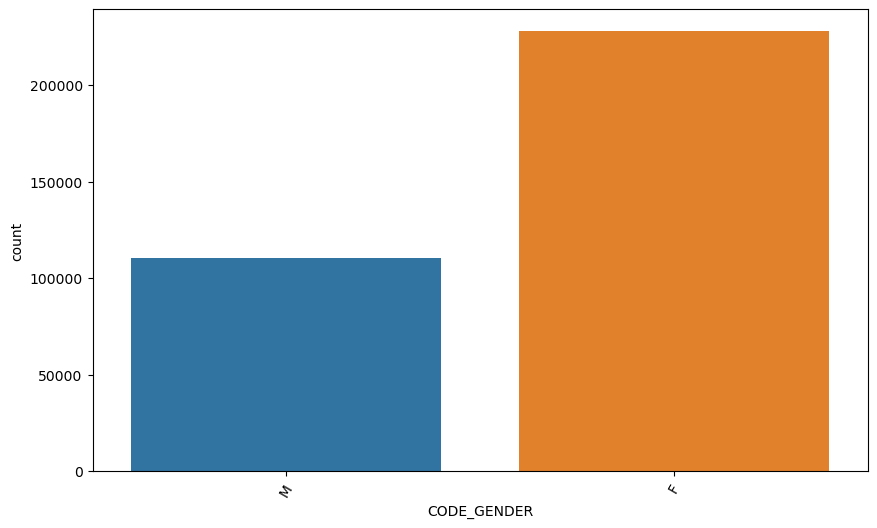

In [13]:
#Analisi della variabile CODE_GENDER
barplot_stat("CODE_GENDER", df4, freq = "Yes")

 Gli individui di sesso femminile, rispetto a quelli di sesso maschile, sono in numero maggiore.

FLAG_OWN_CAR --- Absolute frequency distribution
N    213195
Y    125231
Name: FLAG_OWN_CAR, dtype: int64

FLAG_OWN_CAR --- Relative frequency distribution
N    0.62996
Y    0.37004
Name: FLAG_OWN_CAR, dtype: float64



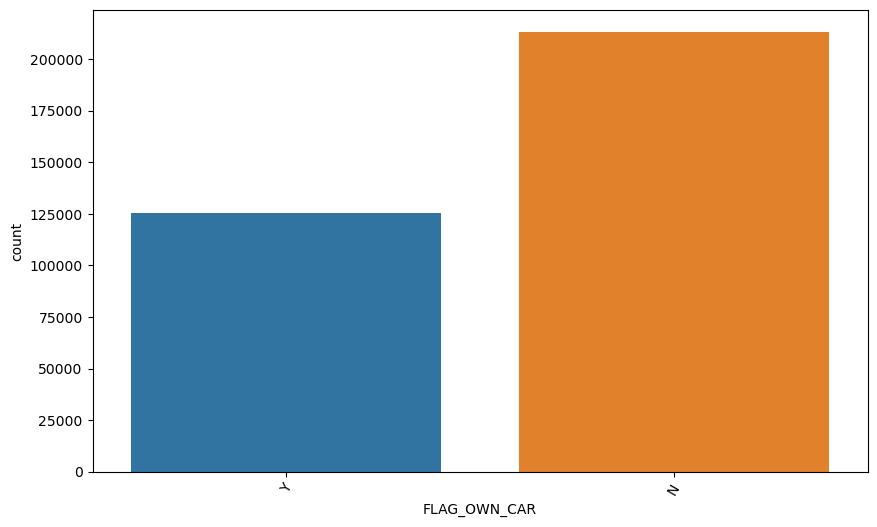

In [14]:
#Analisi della variabile FLAG_OWN_CAR
barplot_stat("FLAG_OWN_CAR", df4, freq = "Yes")

Sembra che i possessori di un'automobile rappresentino circa il 40% del totale.

OCCUPATION_TYPE --- Absolute frequency distribution
Missing                  103341
Laborers                  60146
Core staff                33527
Sales staff               31652
Managers                  27384
Drivers                   20020
High skill tech staff     13399
Accountants               12281
Medicine staff            10438
Cooking staff              6248
Security staff             6218
Cleaning staff             4594
Private service staff      2787
Low-skill Laborers         1714
Secretaries                1577
Waiters/barmen staff       1245
Realty agents               852
HR staff                    567
IT staff                    436
Name: OCCUPATION_TYPE, dtype: int64

OCCUPATION_TYPE --- Relative frequency distribution
Missing                  0.305358
Laborers                 0.177723
Core staff               0.099067
Sales staff              0.093527
Managers                 0.080916
Drivers                  0.059156
High skill tech staff    0.039592
Accountants  

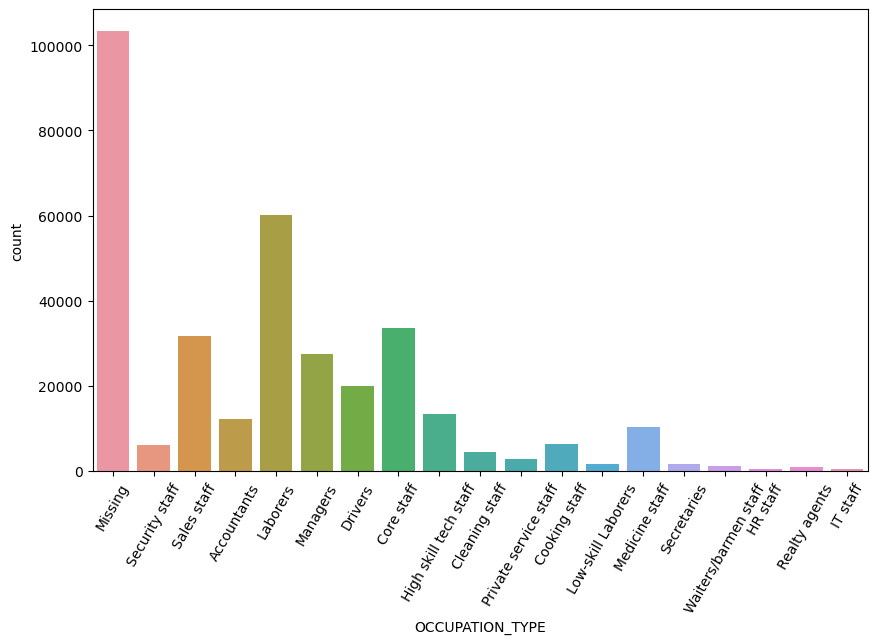

In [15]:
#Analisi sulla variabile OCCUPATION_TYPE
barplot_stat("OCCUPATION_TYPE", df4, freq = "Yes")

Il report ottenuto dalla barplot_stat function suggerisce di ragruppare le classi con cardinalità inferiore a 10000 in un unica classe. Optiamo per questa scelta in modo così da alleggerire il futuro split del dataset in fase di one hot encoding per la variabile categoriale OCCUPATION_TYPE. 

OCCUPATION_TYPE --- Absolute frequency distribution
Missing                    103341
Laborers                    60146
Core staff                  33527
Sales staff                 31652
Managers                    27384
Grouped_OCCUPATION_TYPE     26238
Drivers                     20020
High skill tech staff       13399
Accountants                 12281
Medicine staff              10438
Name: OCCUPATION_TYPE, dtype: int64

OCCUPATION_TYPE --- Relative frequency distribution
Missing                    0.305358
Laborers                   0.177723
Core staff                 0.099067
Sales staff                0.093527
Managers                   0.080916
Grouped_OCCUPATION_TYPE    0.077530
Drivers                    0.059156
High skill tech staff      0.039592
Accountants                0.036289
Medicine staff             0.030843
Name: OCCUPATION_TYPE, dtype: float64



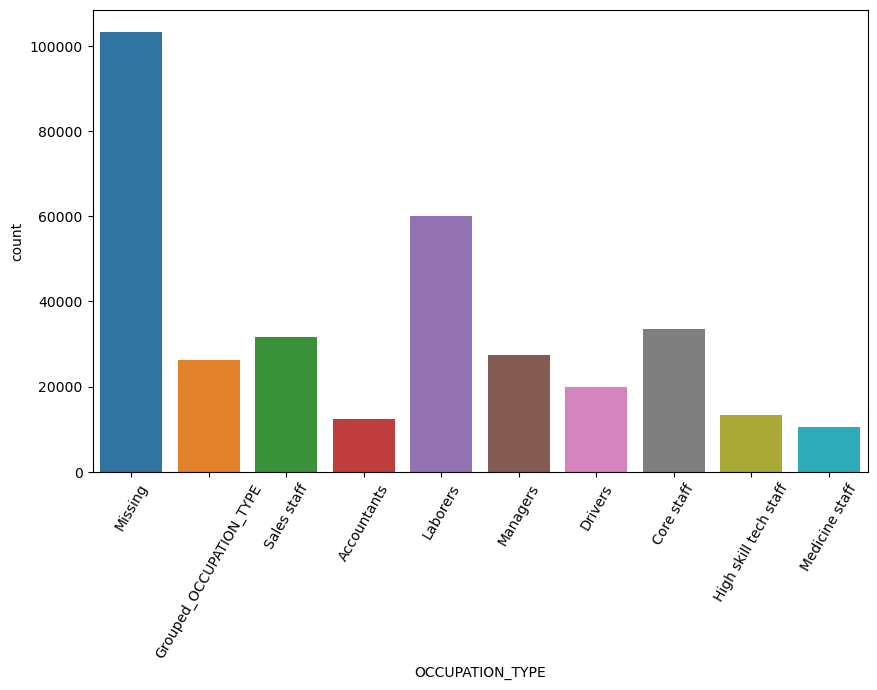

In [16]:
#OCCUPATION_TYPE: procedura di group by per le classi con cardinalità inferiore a 10000 soggetti
df4['OCCUPATION_TYPE'] = df4['OCCUPATION_TYPE'].replace(regex='Cooking staff', value='Grouped_OCCUPATION_TYPE')
df4['OCCUPATION_TYPE'] = df4['OCCUPATION_TYPE'].replace(regex='Security staff', value='Grouped_OCCUPATION_TYPE')
df4['OCCUPATION_TYPE'] = df4['OCCUPATION_TYPE'].replace(regex='Cleaning staff', value='Grouped_OCCUPATION_TYPE')
df4['OCCUPATION_TYPE'] = df4['OCCUPATION_TYPE'].replace(regex='Private service staff', value='Grouped_OCCUPATION_TYPE')
df4['OCCUPATION_TYPE'] = df4['OCCUPATION_TYPE'].replace(regex='Low-skill Laborers', value='Grouped_OCCUPATION_TYPE')
df4['OCCUPATION_TYPE'] = df4['OCCUPATION_TYPE'].replace(regex='Secretaries', value='Grouped_OCCUPATION_TYPE')
df4['OCCUPATION_TYPE'] = df4['OCCUPATION_TYPE'].replace(regex='Waiters/barmen staff', value='Grouped_OCCUPATION_TYPE')
df4['OCCUPATION_TYPE'] = df4['OCCUPATION_TYPE'].replace(regex='Realty agents', value='Grouped_OCCUPATION_TYPE')
df4['OCCUPATION_TYPE'] = df4['OCCUPATION_TYPE'].replace(regex='HR staff', value='Grouped_OCCUPATION_TYPE')
df4['OCCUPATION_TYPE'] = df4['OCCUPATION_TYPE'].replace(regex='IT staff', value='Grouped_OCCUPATION_TYPE')

#Riesecuzione della barplot_stat
barplot_stat("OCCUPATION_TYPE", df4, freq = "Yes")

NAME_EDUCATION_TYPE --- Absolute frequency distribution
Secondary / secondary special    232568
Higher education                  91062
Incomplete higher                 11387
Lower secondary                    3177
Academic degree                     232
Name: NAME_EDUCATION_TYPE, dtype: int64

NAME_EDUCATION_TYPE --- Relative frequency distribution
Secondary / secondary special    0.687205
Higher education                 0.269075
Incomplete higher                0.033647
Lower secondary                  0.009388
Academic degree                  0.000686
Name: NAME_EDUCATION_TYPE, dtype: float64



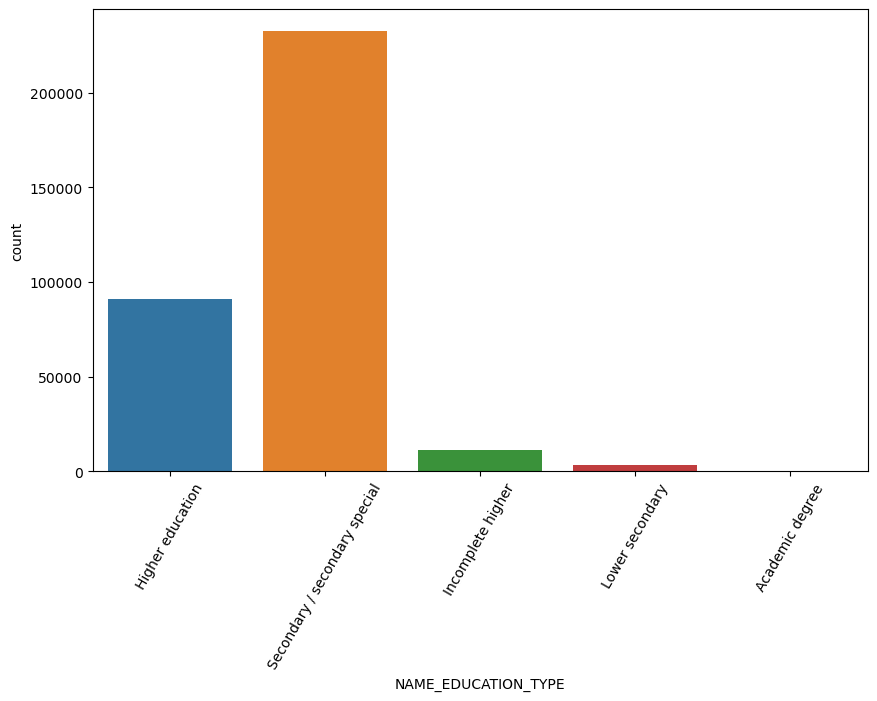

In [17]:
#Analisi sulla variabile NAME_EDUCATION_TYPE
barplot_stat("NAME_EDUCATION_TYPE", df4, freq = "Yes")

Dato che abbiamo solo 5 classi, optiamo a non effettuare eventuali raggruppamenti per la variabile NAME_EDUCATION_TYPE.

NAME_FAMILY_STATUS --- Absolute frequency distribution
Married                 231494
Single / not married     42509
Civil marriage           28516
Separated                20809
Widow                    15098
Name: NAME_FAMILY_STATUS, dtype: int64

NAME_FAMILY_STATUS --- Relative frequency distribution
Married                 0.684031
Single / not married    0.125608
Civil marriage          0.084261
Separated               0.061488
Widow                   0.044612
Name: NAME_FAMILY_STATUS, dtype: float64



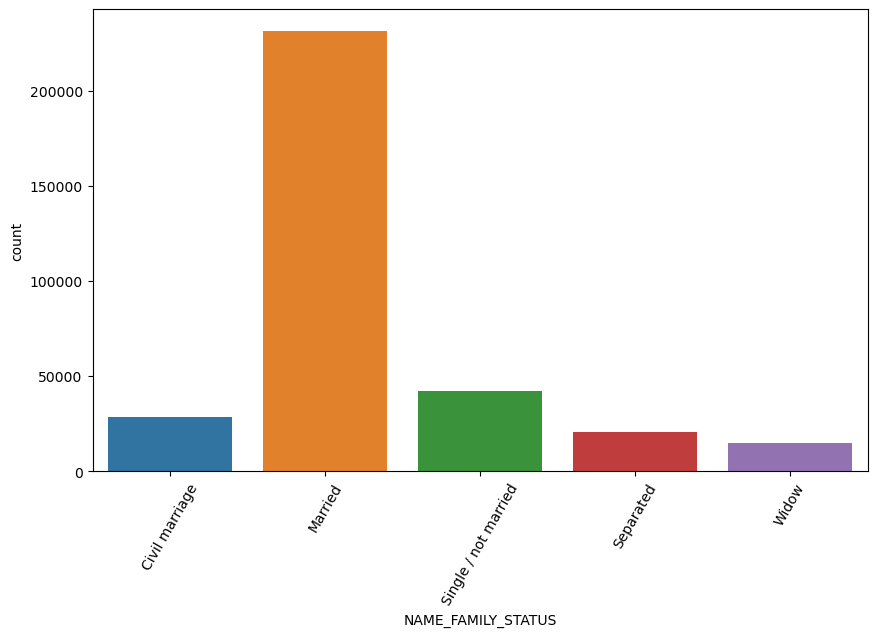

In [18]:
#Analisi sulla variabile NAME_FAMILY_STATUS
barplot_stat("NAME_FAMILY_STATUS", df4, freq = "Yes")

In modo analogo alla variabile NAME_EDUCATION_TYPE, anche per la NAME_FAMILY_STATUS optiamo a non effettuare nessun raggruppamento.

CNT_CHILDREN --- Absolute frequency distribution
0     234630
1      67922
2      31117
3       4252
4        367
5        120
9          4
12         4
6          4
14         3
7          2
19         1
Name: CNT_CHILDREN, dtype: int64

CNT_CHILDREN --- Relative frequency distribution
0     0.693298
1     0.200700
2     0.091946
3     0.012564
4     0.001084
5     0.000355
9     0.000012
12    0.000012
6     0.000012
14    0.000009
7     0.000006
19    0.000003
Name: CNT_CHILDREN, dtype: float64



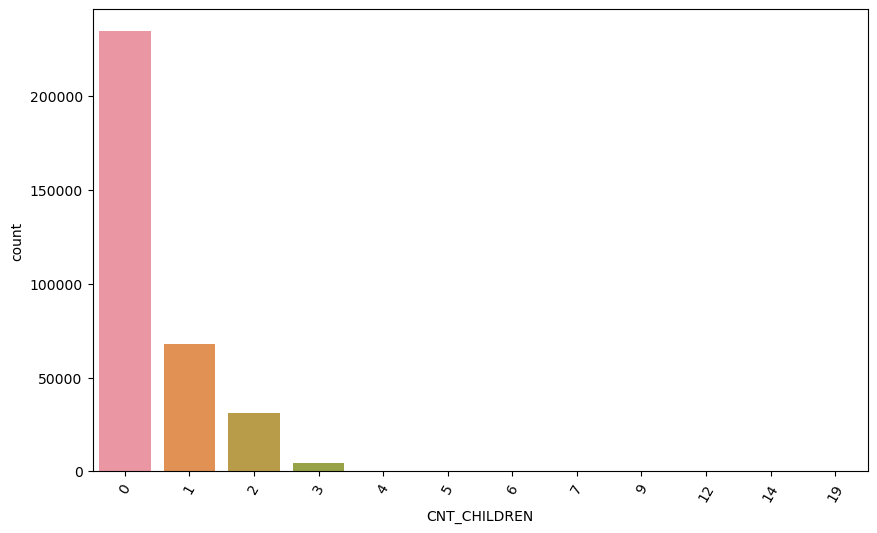

In [19]:
#Analisi sulla variabile CNT_CHILDREN
barplot_stat("CNT_CHILDREN", df4, freq = "Yes")

La variabile CNT_CHILDREN rappresenta il numero di figli a carico del soggetto. Notiamo che le percentuali maggiori o uguali a 3 figli sono al di sotto dell'1%. 

TARGET --- Absolute frequency distribution
0    308704
1     29722
Name: TARGET, dtype: int64

TARGET --- Relative frequency distribution
0    0.912176
1    0.087824
Name: TARGET, dtype: float64



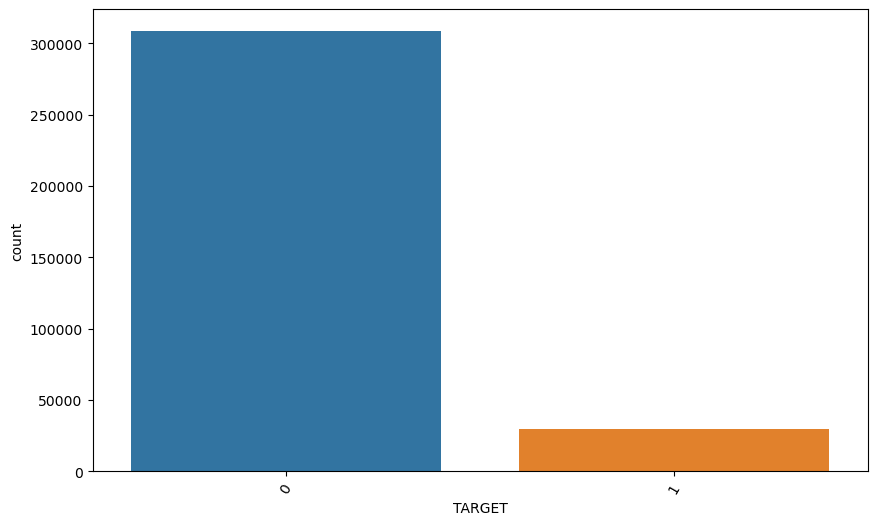

In [20]:
#Analisi sulla variabile TARGET 
barplot_stat("TARGET", df4, freq = "Yes")

La variable TARGET ha l'8% di valorizzazioni a 1: questo rappresenta un problema dato che dovremo applicare modelli di classificazione. Si potrebbe optare per procedeure di oversampling. Prima di procedere, effettuiamo una correlation matrix per indagare eventuali relazioni lineari molto alte tra le varie coppie di variabili.

<AxesSubplot:>

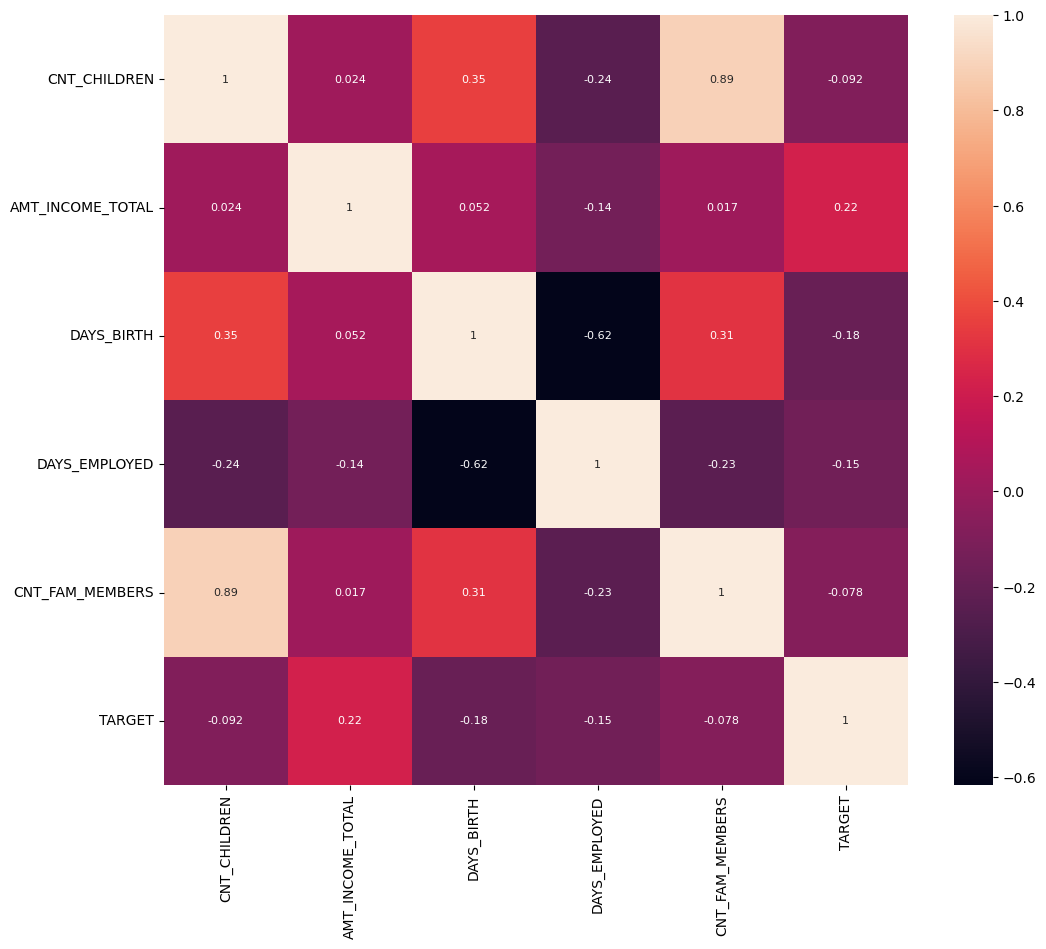

In [21]:
#Correlation matrix: analizziamo eventuali relazioni lineari tra le variabili
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df4.corr(), annot = True, annot_kws={'size':8})

Notiamo che le variabili CNT_CHILDREN e CNT_FAM_MEMBERS presentano un coefficiente di correlazione pari a 0.89. Questa valorizzazione era sospettabile a priori dato che CNT_CHILDREN rappresenta il numero di figli a carico e CNT_FAM_MEMBERS il numero di membri del nucleo familiare. Si potrebbe optare a eliminare una delle due variabili qualora i modelli di classificazione che adotteremo non risultassero performanti. Per ora le considereremo all'interno del dataset.

### ENCODING
Procediamo all'encoding delle variabili categoriali.

In [22]:
#Encoding delle variabili categoriche: applicazione di un one-hot encoding (eventuale option dummy_na=True)
df_encod = pd.get_dummies(df4, columns=['CODE_GENDER', 
                                        'FLAG_OWN_CAR',
                                        'FLAG_OWN_REALTY',
                                        'NAME_INCOME_TYPE',
                                        'NAME_EDUCATION_TYPE',
                                        'NAME_FAMILY_STATUS',
                                        'OCCUPATION_TYPE'])
df_encod.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,TARGET,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Grouped_OCCUPATION_TYPE,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Missing,OCCUPATION_TYPE_Sales staff
0,0,427500.0,-12005.0,-4542.0,2.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,427500.0,-12005.0,-4542.0,2.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,112500.0,-21474.0,-1134.0,2.0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,270000.0,-19110.0,-3051.0,1.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,270000.0,-19110.0,-3051.0,1.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### TRAINING & TEST SET
In questa sezione prepariamo il training e il test set per i successivi modelli di classificazione, l'applicazione dell'oversampling e la standardizzazione delle variabili numeriche.

In [23]:
#Modelling: costruzione del set di train e di test
features = df_encod.drop(['TARGET'], axis=1)
target = df_encod['TARGET']

#Uso della stratify option sulla variabile target in modo da mantenere la stessa distribuzione di 0 e 1
#della variabile target sia nel training che nel test set
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=.3)

In [24]:
#OverSampling: optiamo a una ridistribuzione equilibrata, si potrebbero testare proporzioni diverse
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

#Summary pre-oversampling
print(f"Prima dell'oversampling: {collections.Counter(y_train)}")

#Oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
features_resampled, target_resampled = oversample.fit_resample(X_train, y_train)

#Check post-oversampling
print(f"Dopo l'oversampling: {collections.Counter(target_resampled)}")

Prima dell'oversampling: Counter({0: 216093, 1: 20805})
Dopo l'oversampling: Counter({0: 216093, 1: 216093})


In [25]:
#Standardizzazione delle numeriche sul set di training e di test
scaler = StandardScaler()
features_resampled = scaler.fit_transform(features_resampled)
X_test = scaler.transform(X_test)

### LOGISTIC REGRESSION
Un primo modello: proviamo ad applicare una regressione logistica.

In [26]:
#Fitting: applicazione della logit regression
lr = LogisticRegression()
result = lr.fit(features_resampled, target_resampled)
result

LogisticRegression()

In [27]:
#Valutazione del modello: studio della LOGLOSS. Per determinare la logloss iniziamo a determinare i 
#rispettivi valori probabilistici (predict_proba)
y_pred_train = lr.predict(features_resampled)
y_proba_train = lr.predict_proba(features_resampled)
y_pred_test = lr.predict(X_test)
y_proba_test = lr.predict_proba(X_test)
     
print(f"TRAIN LOGLOSS: {log_loss(target_resampled, y_proba_train)}")
print(f"TEST LOGLOSS: {log_loss(y_test, y_proba_test)}")

TRAIN LOGLOSS: 0.3510088046005555
TEST LOGLOSS: 0.406786293693607


In [28]:
#Classification report sul test set
def classification_report(y_true, y_pred):
    print(f"ACCURACY: {accuracy_score(y_true, y_pred)}")
    print(f"PRECISION: {precision_score(y_true, y_pred)}")
    print(f"RECALL: {recall_score(y_true, y_pred)}")
    
classification_report(y_test, y_pred_test)

ACCURACY: 0.8235954613505634
PRECISION: 0.3181836561400671
RECALL: 0.8824716833015588


Osserviamo un'accuarcy e una recall molto alta sul test set: per il nostro problema di classificazione queste due metriche sono di grande importanza. Effettuiamo un classification report equivalente confrontando il tutto anche col train set.

In [29]:
#Analogo classification report usando la sklearn library sul test set
from sklearn.metrics import classification_report
print("Test set")
print(classification_report(y_test, y_pred_test, digits = 4))

#NB: digits = 4 è una option per specificare il numero di cifre per l'arrotondamento

#Confronto con il train set
print("Train set")
print(classification_report(target_resampled, y_pred_train, digits = 4))

Test set
              precision    recall  f1-score   support

           0     0.9864    0.8179    0.8943     92611
           1     0.3182    0.8825    0.4677      8917

    accuracy                         0.8236    101528
   macro avg     0.6523    0.8502    0.6810    101528
weighted avg     0.9277    0.8236    0.8568    101528

Train set
              precision    recall  f1-score   support

           0     0.8760    0.8193    0.8467    216093
           1     0.8303    0.8840    0.8563    216093

    accuracy                         0.8517    432186
   macro avg     0.8532    0.8517    0.8515    432186
weighted avg     0.8532    0.8517    0.8515    432186



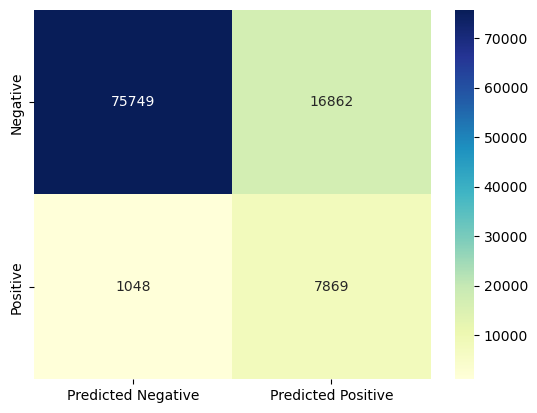

In [30]:
#Confusion matrix: grafico della matrice di confusione per il set di test
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precision=True, show_recall=True):
  cm = confusion_matrix(y_true, y_pred) #tn, fp, fn, tp 
  df_cm = pd.DataFrame(cm, index = labels, columns = ["Predicted "+labels[0],"Predicted "+labels[1]])
  sns.heatmap(df_cm, annot=True, fmt='d',  cmap='YlGnBu') #fmt è il format digit 

plot_confusion_matrix(y_test, y_pred_test)

In [31]:
#Checking for overfitting
print('Training set score: {:.4f}'.format(lr.score(features_resampled, target_resampled)))
print('Test set score: {:.4f}'.format(lr.score(X_test, y_test)))

Training set score: 0.8517
Test set score: 0.8236


Gli score sono abbastanza simili: non sembra emergere un problema di un eventuale overfitting.

### LOGISTIC REGRESSION WITH GRADIENT DESCEND
In questa sezione effettuamo una regressione logistica applicando la nota ottimizzazione del gradiente discendente. In Python applicheremo la nota function SGDClassifier importata dalla sklearn library.

In [32]:
from sklearn.linear_model import SGDClassifier
RANDOM_SEED = 0 #Random seed: inizializzazione del seme

#Gradient Descent
model_gd = SGDClassifier(max_iter=1000,
                         penalty="elasticnet",
                         alpha=0.1,
                         l1_ratio=0.9,
                         learning_rate="adaptive",
                         eta0=0.01,
                         random_state=RANDOM_SEED)

#Fitting
model_gd.fit(features_resampled, target_resampled)

SGDClassifier(alpha=0.1, eta0=0.01, l1_ratio=0.9, learning_rate='adaptive',
              penalty='elasticnet', random_state=0)

Proviamo ora ad effettuare un confronto con le metriche ottenute dal modello logistico e quello appena creato tramite l'ottimizzazione del gradiente.

In [33]:
#Valutazione del Gradient Descent con la classificazione logistica del primo modello 

#Costruzione della funzione di valutazione
def evaluate(model, data):
    x, y = data
    y_pred = model.predict(x)
    print(f"Accuracy {model}: {accuracy_score(y, y_pred)}")
    print(f"Precision {model}: {precision_score(y, y_pred)}")
    print(f"Log Loss {model}: {log_loss(y, y_pred)}")
    
    """
    La evaluate fuction prende in input gli output di un modello di classificazione (variabile model) e 
    un vettore di due componenti (la variabile data, contenente le features e la variabile target su 
    cui applicare il modello) 
    """

In [34]:
#Evaluation function sui modelli lr (regressione logistica) & model_gd (gradient descent)
evaluate(lr, (features_resampled, target_resampled))
evaluate(model_gd, (features_resampled, target_resampled))

Accuracy LogisticRegression(): 0.8516772870939827
Precision LogisticRegression(): 0.830306770865026
Log Loss LogisticRegression(): 5.346092453718022
Accuracy SGDClassifier(alpha=0.1, eta0=0.01, l1_ratio=0.9, learning_rate='adaptive',
              penalty='elasticnet', random_state=0): 0.858970443281365
Precision SGDClassifier(alpha=0.1, eta0=0.01, l1_ratio=0.9, learning_rate='adaptive',
              penalty='elasticnet', random_state=0): 0.7927318012000453
Log Loss SGDClassifier(alpha=0.1, eta0=0.01, l1_ratio=0.9, learning_rate='adaptive',
              penalty='elasticnet', random_state=0): 5.083220459987317


Osserviamo che in termini di Accuracy e LogLoss, i due modelli sono abbastanza simili e che in termini di metriche sono buoni. Nello specifico, il modello in cui si applica il gradient descent è di poco più performante in termini di Accuracy. In termini di precision il modello logistico è quello con precision maggiore, con un delta del 3% circa. Nella sezione che segue proviamo a implementare un ulteriore tecnica: un algoritmo di gradient boosting, provando a vedere se risulta più performante in termini di metriche rispetto ai due modelli di regressione logistica finora adottati. 

### GRADIENT BOOSTING
In questa sezione proviamo a implementare un modello di gradient boosting tramite la function GradientBoostingClassifier proveniente dalla sklearn library. Adotteremo 100 alberi come stimatori deboli e una learning rate impostata a 0.1.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

#GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#Fitting & prevision
model_gbc.fit(features_resampled, target_resampled)
y_pred = model_gbc.predict(features_resampled)

In [36]:
#Richiamo della evaluate function
evaluate(model_gbc, (features_resampled, target_resampled))

Accuracy GradientBoostingClassifier(random_state=42): 0.9791848879880422
Precision GradientBoostingClassifier(random_state=42): 0.9600335867145885
Log Loss GradientBoostingClassifier(random_state=42): 0.7502526826146566


Confrontando con le metriche prima osservate, il gradient boosting sembra il modello più performante in termini di Accuracy e Precision rispetto ai due precedenti modelli di regressione.

### DECISION TREE
In questa sezione proviamo a implementare un decision tree col fine di rispondere al punto bonus. L'applicazione di un decision tree permette di creare una Variables Importance sulle variabili che hanno portato alla decisione di accettare o negare l'assegnazione della carta: per il nostro scopo, un decision tree rappresenta un modello facilmente interpretabile per questo fine. Nello specifico, lo studio della Variables Importance permette di assegnare un grado di importanza alle variabili, in modo così da dedurre chi siano quelle più "decisionali".  

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

#Features selection
X = df_encod.drop('TARGET', axis=1)

#Variabile target
y = df_encod['TARGET']

In [38]:
#Training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
#Training del modello sul train set
modello = DecisionTreeClassifier(max_depth=3, random_state=42)
modello.fit(X_train, y_train)

#Model scoring
score = modello.score(X_test, y_test)
print(f'Accuratezza del modello: {score:.2f}')

Accuratezza del modello: 0.96


Proviamo a visualizzare l'albero in modo da vedere le decisioni prese in base ai valori delle features. In questo modo si riescono anche a visualizzare le soglie di decisione adottate.

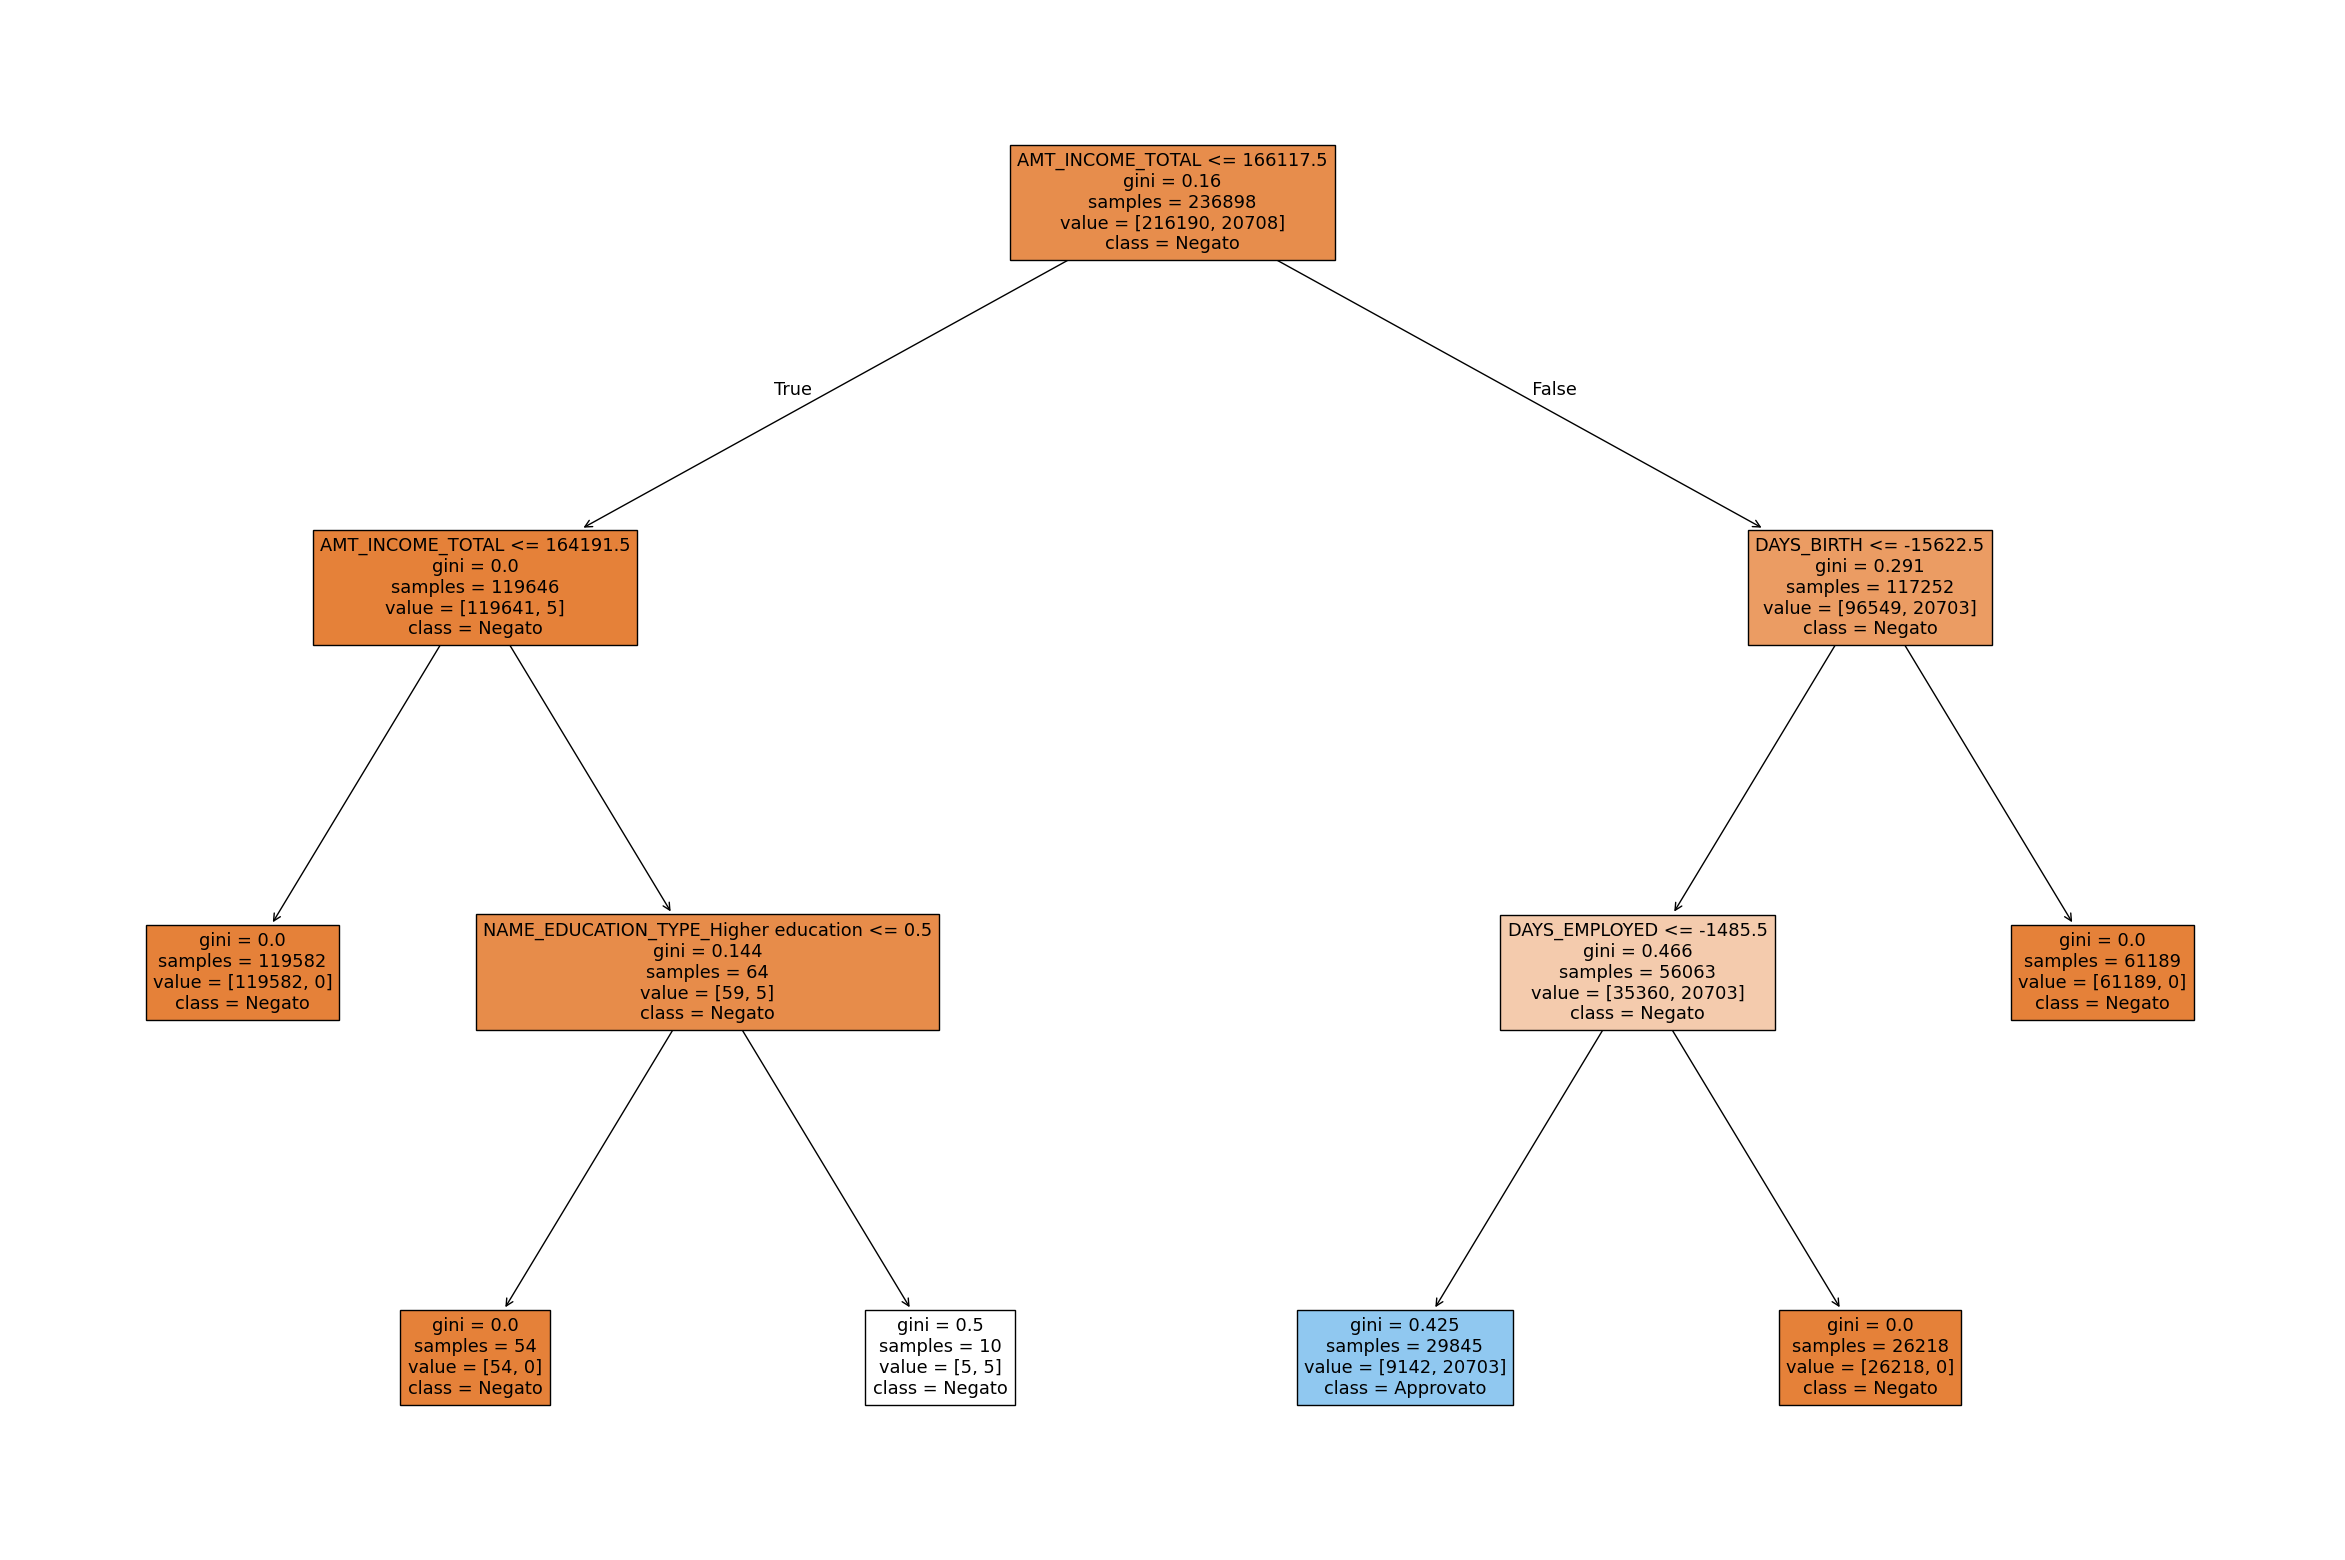

In [40]:
#Visualizzazione dell'albero decisionale
plt.figure(figsize = (30,20))
tree.plot_tree(modello, feature_names=X.columns, class_names=['Negato', 'Approvato'], filled=True)
plt.show()

Variables Importance: applicando un modello di albero decisionale, possiamo facilmente fare considerazioni su quelle variabili ritenute più "decisionali" per il modello. Il calcolo della Variables Importance potrebbe fornire a priori delle informazioni sulle variabili da considerare per giustificare le scelte di concedere o meno il rilascio della carta.

In [41]:
#Calcolo della Variables Importance
importanza_variabili = pd.DataFrame({
    'Caratteristica': X.columns,
    'Importanza': modello.feature_importances_}).sort_values(by='Importanza', ascending=False)

print(importanza_variabili)

                                       Caratteristica  Importanza
3                                       DAYS_EMPLOYED    0.534991
2                                          DAYS_BIRTH    0.317813
1                                    AMT_INCOME_TOTAL    0.147027
17               NAME_EDUCATION_TYPE_Higher education    0.000168
0                                        CNT_CHILDREN    0.000000
27                         OCCUPATION_TYPE_Core staff    0.000000
22                         NAME_FAMILY_STATUS_Married    0.000000
23                       NAME_FAMILY_STATUS_Separated    0.000000
24            NAME_FAMILY_STATUS_Single / not married    0.000000
25                           NAME_FAMILY_STATUS_Widow    0.000000
26                        OCCUPATION_TYPE_Accountants    0.000000
28                            OCCUPATION_TYPE_Drivers    0.000000
20  NAME_EDUCATION_TYPE_Secondary / secondary special    0.000000
29            OCCUPATION_TYPE_Grouped_OCCUPATION_TYPE    0.000000
30        

Notiamo che le variabili più "decisionali" sembrano essere tre: DAYS_EMPLOYED, DAYS_BIRTH e AMT_INCOME_TOTAL. Proviamo ora a fornire un esempio per ottenere il path decisionale per un cliente specifico: fissato un cliente (o meglio, le sue features) all'interno del dataset, cerchiamo di ricostruire il suo  path all'interno dell'albero decisionale. Possiamo utilizzare la decision_path function. Questa restituisce come output una matrice sparsa in cui la prima colonna contiene l'identificativo numerico del cliente, mentre la seconda colonna l'elenco dei nodi percorsi nell'albero.


In [42]:
#Il cliente di cui vogliamo conoscere il path decisionale e suo path decisionale
#cliente = X_test.iloc[0].values.reshape(1, -1)
cliente = X_test.iloc[[1]] 
path = modello.decision_path(cliente)

print("Percorso decisionale per il cliente:\n")
print(path)

Percorso decisionale per il cliente:

  (0, 0)	1
  (0, 6)	1
  (0, 10)	1


Pertanto il cliente "1" ha attraversato i nodi 0, 1 e 2 all'interno dell'albero. Proviamo a rendere più parlante la matrice sparsa prima estratta per il cliente. Utilizzeremo le seguenti function:

* indices: contiene gli indici dei nodi che il modello ha attraversato per arrivare a una determinata decisione finale (ovvero il raggiungimento di una foglia specifica dell'albero). Ogni nodo corrisponde a un'operazione di confronto su una determinata feature del cliente: il modello confronta il valore della feature del cliente con una soglia (threshold) e sceglie il ramo da seguire (sinistra se è "vero", destra se è "falso");

* feature: restituisce una lista di lunghezza pari al numero di nodi nell'albero decisionale;

* tree_.threshold: le soglie utilizzate in ciascun nodo per confrontare il valore della feature del cliente. Il modello verifica se il valore della feature è minore o uguale a questa soglia per decidere quale ramo seguire (sinistra o destra).

In [43]:
#Estrazione degli indici dei nodi attraversati: applicazione della indices function sul path
nodi_atraversati = path.indices

#Estrazione delle feature utilizzate per il percorso decisionale
n_features = modello.tree_.feature
valori_soglia = modello.tree_.threshold

In [44]:
print(f"nodi_atraversati: {nodi_atraversati}")
print(f"n_features: {n_features}")
print(f"valori_soglia: {valori_soglia}")

nodi_atraversati: [ 0  6 10]
n_features: [ 1  1 -2 17 -2 -2  2  3 -2 -2 -2]
valori_soglia: [ 1.661175e+05  1.641915e+05 -2.000000e+00  5.000000e-01 -2.000000e+00
 -2.000000e+00 -1.562250e+04 -1.485500e+03 -2.000000e+00 -2.000000e+00
 -2.000000e+00]


Proviamo ora a esplicitare il path decisionale del cliente "1". Per ciascun nodo attraversato, il ciclo for, che a breve applicheremo, esegue i seguneti step:

* verifica se il nodo è una foglia (se non lo è, continua l'analisi);
* trova il nome della feature che viene utilizzata per il confronto in quel nodo;
* ottiene la soglia con cui il modello confronta il valore della feature;
* confronta il valore della feature del cliente con la soglia e visualizza la decisione presa.

In [45]:
#print(f"Percorso decisionale per il cliente {X_test.iloc[0]}:\n")

for nodo in nodi_atraversati:
    if n_features[nodo] != -2:  # Se il nodo non è una foglia
        nome_caratteristica = X.columns[n_features[nodo]]
        soglia = valori_soglia[nodo]
        
        # Accedi correttamente al valore della caratteristica del cliente
        valore_caratteristica_cliente = cliente.iloc[0, n_features[nodo]]
        
        print(f"Se {nome_caratteristica} <= {soglia}, valore del cliente: {valore_caratteristica_cliente}")

Se AMT_INCOME_TOTAL <= 166117.5, valore del cliente: 202500.0
Se DAYS_BIRTH <= -15622.5, valore del cliente: -12172.0


Proviamo a interpretare il path del cliente fissato:

* la feature AMT_INCOME_TOTAL è stata confrontata con 166117.5. Poiché 202500.0 >= 166117.5, il modello ha proseguito lungo il ramo destro;
* la feature DAYS_BIRTH è stata confrontata con la soglia -15622.5. In questo caso, il valore -12172.0  è inferiore alla soglia, quindi si è ancora preso il ramo destro.

In questo caso specifico, ha basato le sue decisioni sulle variabili AMT_INCOME_TOTAL e DAYS_BIRTH.

### CONCLUSIONI
Nel seguente problema di classificazione abbiamo esplorato tre approcci modellistici e un quarto per provare a rispondere al punto bonus: una classificazione logistica, una sua ottimizzazione mediante la tecnica del gradient descent, un algoritmo di boosting e un decision tree. In termini di Accuracy e Precision (per i primi tre modelli), il modello più performante è risultato il gradient boosting. Tutti e tre i modelli hanno dato buoni esiti, di cui il gradient boosting il migliore. Dal punto di vista modellistico, ricordiamo che si è optati a una tecnica di oversampling sulla variabile target, avendo osservato una forte discrepanza percentuale sul dataset iniziale. L'analisi delle variabili sul dataset originale ha portato ad applicare procedure di Data Cleaning e Features Selection. Per alcune variabili categoriche (ad esempio OCCUPATION_TYPE) sono state applicate procedure di raggruppamento per creare delle categorie semplificate per il modello. Come considerazioni, si potrebbero effettuare ulteriori approfondimenti circa l'uso di parametri diversi per il gradient boosting o per il gradient descent.
Per concludere, la scelta del quarto modello adottato, consentirebbe di ottenere anche delle regole decisionali: la tecnica dei decision trees è una scelta ottimale per avere un modello intuibile e facilmente interpretabile dal punto di vista delle regole di decisione. 